# Explore Text

In [1]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd



In [2]:
df_ori = pd.read_csv('./data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['jobpost','Title'])
print(df.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(df_ori.shape[0]-df.shape[0]))

(19001, 24)
(18892, 24)
Removed 109 duplicates (based on jobpost + Title)


In [3]:
df['jobpost_token'] = df.jobpost.map(word_tokenize)

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [4]:
df.jobpost_token.head()

0    [AMERIA, Investment, Consulting, Company, JOB,...
1    [International, Research, &, Exchanges, Board,...
2    [Caucasus, Environmental, NGO, Network, (, CEN...
3    [Manoff, Group, JOB, TITLE, :, BCC, Specialist...
4    [Yerevan, Brandy, Company, JOB, TITLE, :, Soft...
Name: jobpost_token, dtype: object

In [5]:
df.jobpost_token[0]


['AMERIA',
 'Investment',
 'Consulting',
 'Company',
 'JOB',
 'TITLE',
 ':',
 'Chief',
 'Financial',
 'Officer',
 'POSITION',
 'LOCATION',
 ':',
 'Yerevan',
 ',',
 'Armenia',
 'JOB',
 'DESCRIPTION',
 ':',
 'AMERIA',
 'Investment',
 'Consulting',
 'Company',
 'is',
 'seeking',
 'a',
 'Chief',
 'Financial',
 'Officer',
 '.',
 'This',
 'position',
 'manages',
 'the',
 'company',
 "'s",
 'fiscal',
 'and',
 'administrative',
 'functions',
 ',',
 'provides',
 'highly',
 'responsible',
 'and',
 'technically',
 'complex',
 'staff',
 'assistance',
 'to',
 'the',
 'Executive',
 'Director',
 '.',
 'The',
 'work',
 'performed',
 'requires',
 'a',
 'high',
 'level',
 'of',
 'technical',
 'proficiency',
 'in',
 'financial',
 'management',
 'and',
 'investment',
 'management',
 ',',
 'as',
 'well',
 'as',
 'management',
 ',',
 'supervisory',
 ',',
 'and',
 'administrative',
 'skills',
 '.',
 'JOB',
 'RESPONSIBILITIES',
 ':',
 '-',
 'Supervises',
 'financial',
 'management',
 'and',
 'administrative',

In [6]:
df['jobpost_len'] = df.jobpost_token.apply(len)

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
df.jobpost_len.head()

0    1009
1     454
2     366
3     694
4     271
Name: jobpost_len, dtype: int64

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 9))
plt.plot(df.jobpost_len)
plt.title('Length of jobpost (for each of the rows), plotted')

Text(0.5,1,'Length of jobpost (for each of the rows), plotted')

In [9]:
df['jobpost_token_uniq'] = df.jobpost_token.apply(set)

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
df['jobpost_token_uniq']

0        {from, planning, track, this, ', Masters, on, ...
1        {Thanks, Community, established, study, :, 50,...
2        {offices, Thanks, established, :, Please, ), a...
3        {Group, project, approaches, administration, T...
4        {Thanks, 587, :, Visual, from, Please, ), Depa...
5        {Thanks, old, :, Please, ), a, WORK, URL, this...
6        {Thanks, :, Excel, CVs, Please, a, URL, IAS, t...
7        {Thanks, Community, established, Non-paid, stu...
8        {Thanks, 587, :, from, Please, ), compiling, D...
9        {criteria, from, ASG, Management, this, USG, o...
10       {Thanks, logistical, foreign, :, from, Please,...
11       {Thanks, Community, established, Non-paid, stu...
12       {Thanks, project, employer, administration, :,...
13       {offices, Community, 063, 3-32-12, Thanks, :, ...
14       {Thanks, old, :, Please, ), a, URL, relative, ...
15       {Thanks, administration, :, from, Please, ), a...
16       {Thanks, course, :, from, Please, social, fora.

Text(0.5,1,'Length of jobpost unique tokens (for each of the rows), plotted')

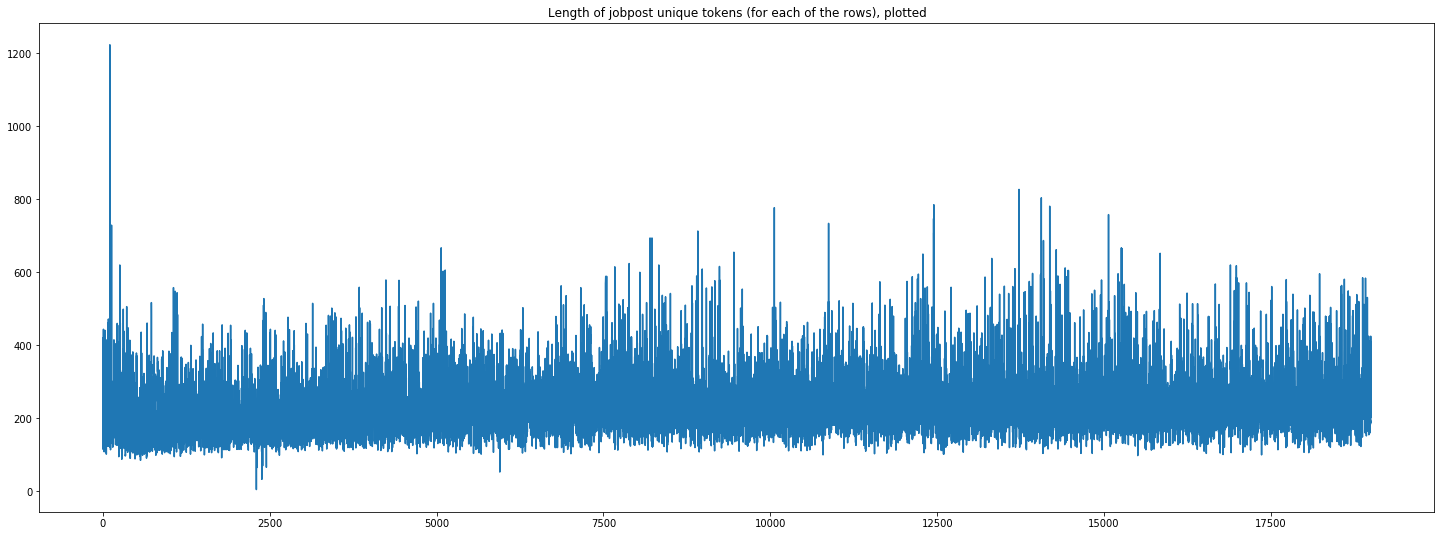

In [11]:
plt.figure(figsize=(25, 9))
plt.plot(df.jobpost_token_uniq.apply(len))
plt.title('Length of jobpost unique tokens (for each of the rows), plotted')

Text(0.5,1,'Avg. no. times each word is used (for each of the rows), plotted')

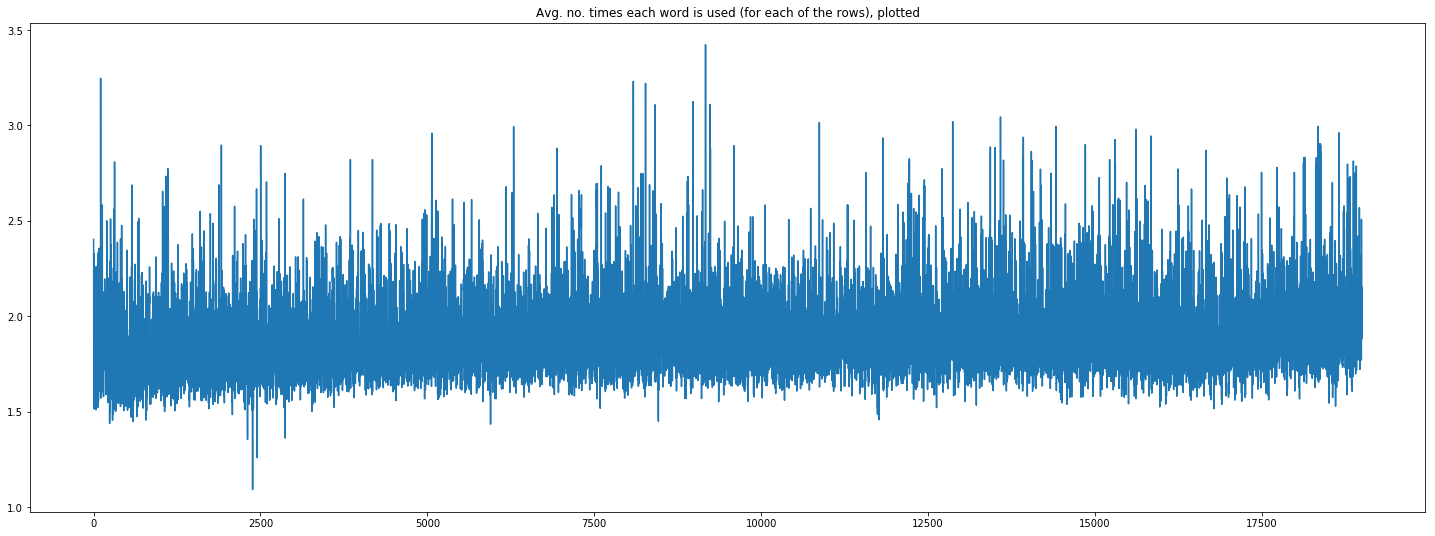

In [12]:
plt.figure(figsize=(25, 9))
plt.plot(df['jobpost_len']/df.jobpost_token_uniq.apply(len))
plt.title('Avg. no. times each word is used (for each of the rows), plotted')

So on average, each word is used 1.5 - 2.5 times in each job posting. 

## Try One Row First, if it works we can make it into a function and apply across the rows

In [13]:
tokens = (df.iloc[0])['jobpost_token']

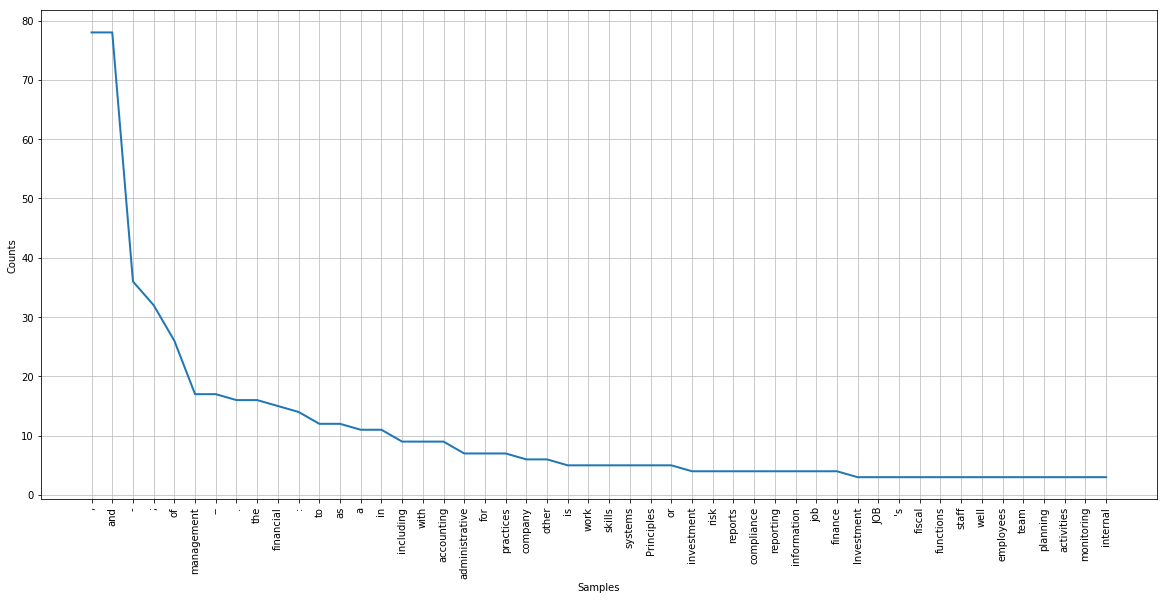

In [14]:
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens)  # case sensitive!
fd.most_common(50)
fd.plot(50)

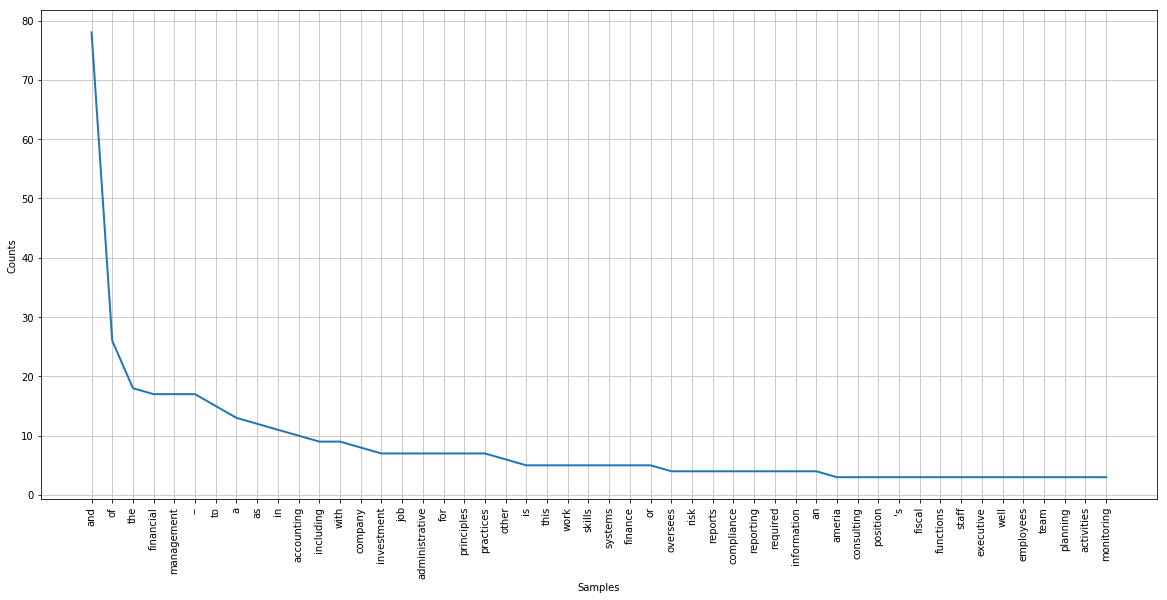

In [15]:
# Remove punctuations, convert all to lower-case, and try again
tokens_nop = [t for t in tokens if t not in string.punctuation]
tokens_nop = [t.lower() for t in tokens_nop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_nop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

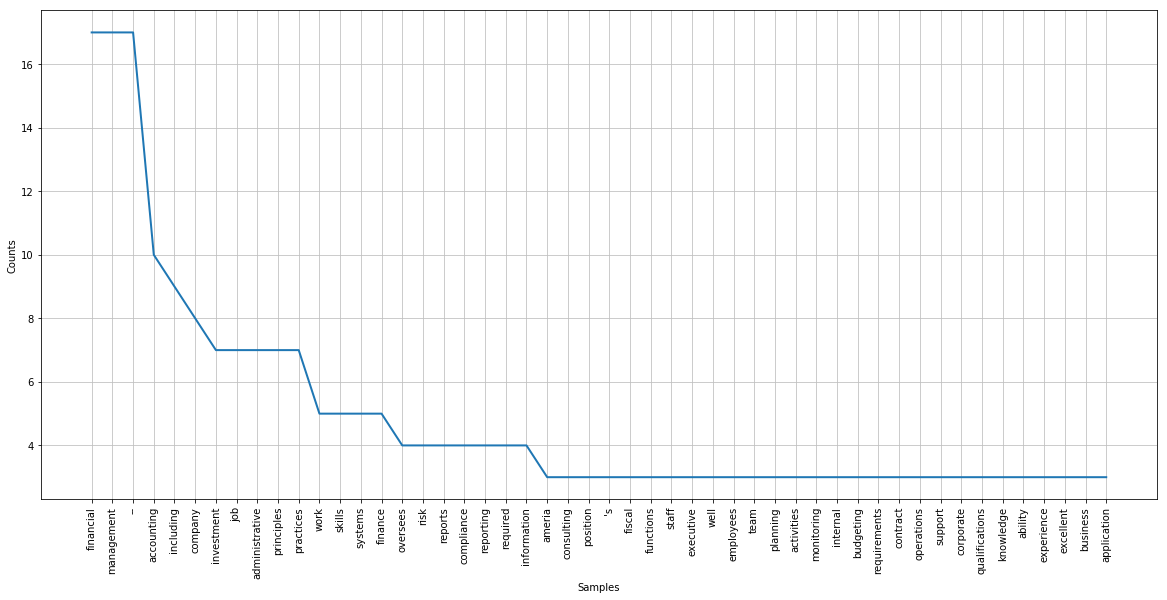

In [16]:
# Remove stopwords, and try again
stop = stopwords.words('english')
tokens_nostop = [t for t in tokens_nop if t not in stop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_nostop)  # case sensitive!
fd.most_common(50)
fd.plot(50)

Tokens starting to have some meaning. What can we do with this? 
Job title is : 

In [17]:
print((df.iloc[0])['Title'])

Chief Financial Officer


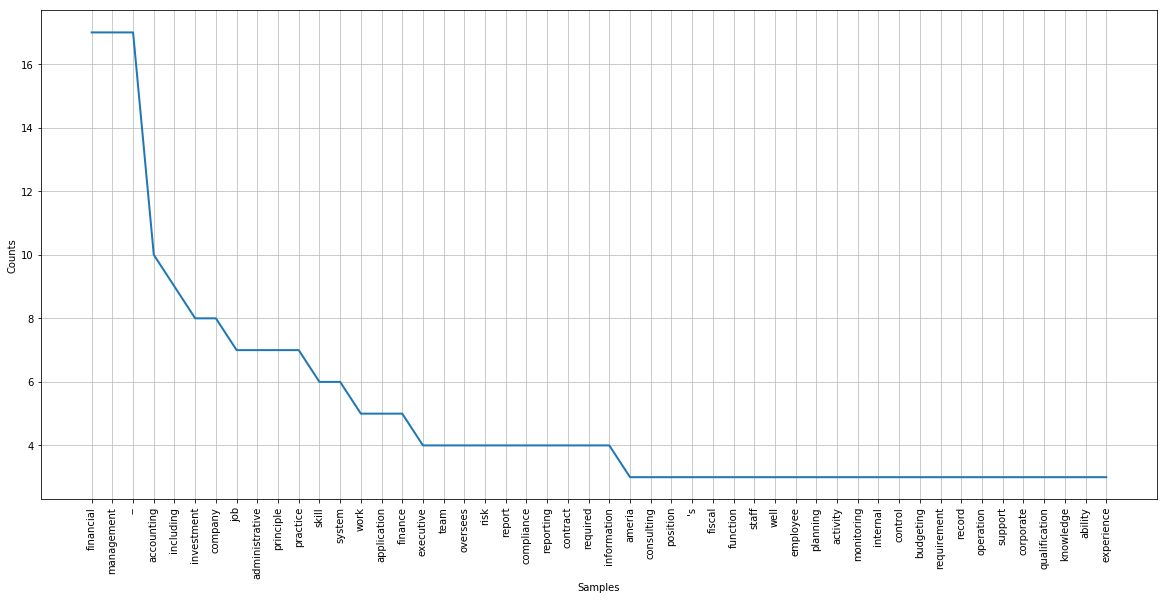

In [18]:
wnl = nltk.WordNetLemmatizer()
tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens_lem)  # case sensitive!
fd.most_common(50)
fd.plot(50)

We see terms like executive and team after WordNet Lemmatizer. Seems to have a positive effect. Also, previous words like "investment", "skill", "system" have been "strengthened".

In [19]:
tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
text_clean = " ".join(tokens_clean)


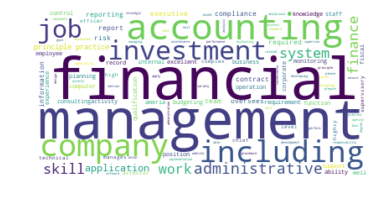

In [20]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

wc = WordCloud(background_color="white").generate(text_clean)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Create a Preprocessing Function for All Rows

In [21]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_clean

def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  # case sensitive!
    fd.plot(50)

In [22]:
tokens_clean = preprocess((df.iloc[4])['jobpost_token']) # we know this is a software job
print(tokens_clean)

['yerevan', 'brandy', 'company', 'job', 'title', 'software', 'developer', 'position', 'location', 'yerevan', 'armenia', 'job', 'responsibility', 'rendering', 'technical', 'assistance', 'database', 'management', 'system', 'realization', 'sql', 'server', 'maintenance', 'activity', 'back-up', 'replication', 'participation', 'designing', 'software', 'development', 'project', 'required', 'qualification', 'university', 'degree', 'economical', 'background', 'plus', 'excellent', 'knowledge', 'window', '2000', 'server', 'networking', 'tcp/', 'technology', 'sql', '2000', 'server', 'visual', 'basic', 'least', 'year', 'experience', 'database', 'software', 'development', 'good', 'knowledge', 'english', 'remuneration', 'commensurate', 'norm', 'accepted', 'company', 'application', 'procedure', 'successful', 'candidate', 'submit', 'relevant', 'recommendation', 'letter', 'previous', 'employer', 'copy', '-ies', 'diploma', 'relevant', 'certificate', 'available', 'color', 'photo', '3x4', 'either', 'isakov

yerevan brandy company job title software developer position location yerevan armenia job responsibility rendering technical assistance database management system realization sql server maintenance activity back-up replication participation designing software development project required qualification university degree economical background plus excellent knowledge window 2000 server networking tcp/ technology sql 2000 server visual basic least year experience database software development good knowledge english remuneration commensurate norm accepted company application procedure successful candidate submit relevant recommendation letter previous employer copy -ies diploma relevant certificate available color photo 3x4 either isakov avenue 375082 yerevan send following fax 587 713 e-mail armine.bibilyan ... human resource department armine bibilyan please clearly mention application letter learned job opportunity career center mention url website www.careercenter.am thanks application

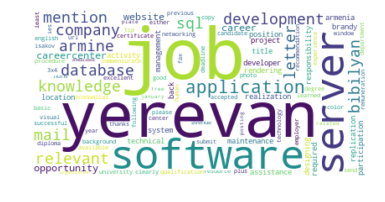

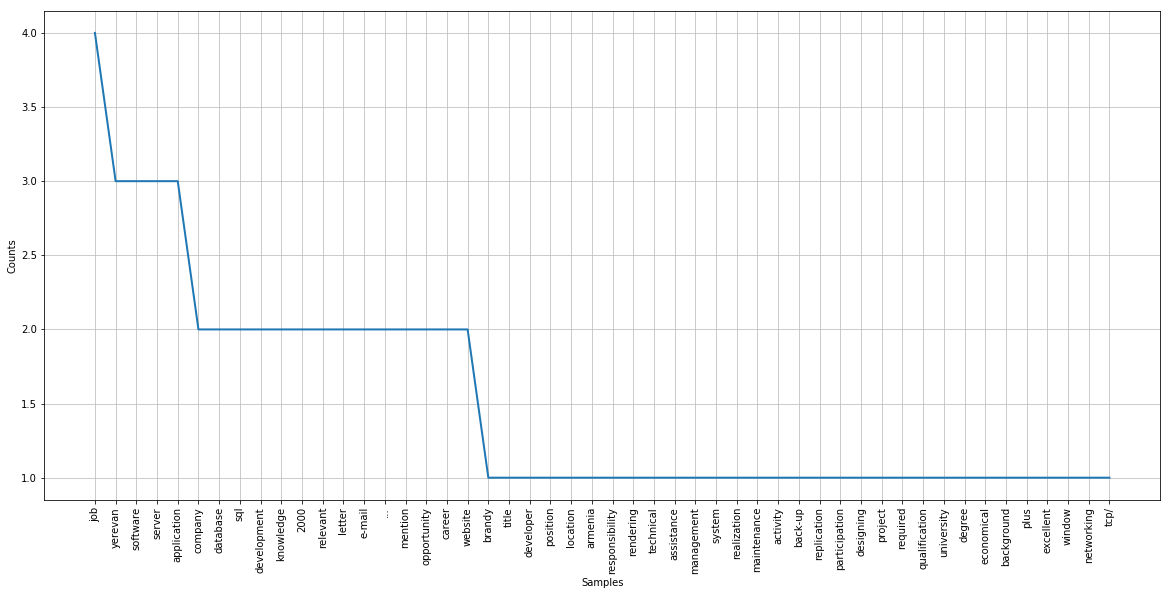

In [23]:
plotWC(tokens_clean)

In [24]:
df['jobpost_processed'] = df.jobpost_token.apply(preprocess)

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
print(df['jobpost_processed'])

0        [ameria, investment, consulting, company, job,...
1        [international, research, exchange, board, ire...
2        [caucasus, environmental, ngo, network, cenn, ...
3        [manoff, group, job, title, bcc, specialist, p...
4        [yerevan, brandy, company, job, title, softwar...
5        [boutique, appollo, job, title, saleswoman, po...
6        [osi, assistance, foundation, armenian, branch...
7        [international, research, exchange, board, ire...
8        [yerevan, brandy, company, job, title, assista...
9        [american, embassy, yerevan, announcement, num...
10       [international, research, exchange, board, ire...
11       [international, research, exchange, board, ire...
12       [institute, sustainable, community, isc, job, ...
13       [food, security, regional, cooperation, stabil...
14       [teleplus, llc, job, title, general, manager, ...
15       [netcall, communication, job, title, network, ...
16       [soc.stockholm, title, utopian, world, champio.

## Get Feature Matrix

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    
df['jobpost_processedtext'] = df.jobpost_processed.apply(lambda x: ' '.join(x))

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [33]:
vec_tf = CountVectorizer()
grain_tf = vec_tf.fit_transform(df['jobpost_processedtext'])
print(grain_tf.shape)

vec_tf = CountVectorizer(min_df=2)
grain_tf = vec_tf.fit_transform(df['jobpost_processedtext'])
print(grain_tf.shape)


(18892, 30122)
(18892, 18176)


In [34]:
print(grain_tf.toarray())
print(vec_tf.get_feature_names())

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
['00', '000', '0001', '0002', '00035799', '00051202', '00064044', '0009', '000amd', '001', '0010', '0011', '0012', '0014', '0015', '0018', '0019', '002', '0025', '0026', '003', '0032', '0033', '0037', '0037410', '004', '0043', '005', '0052', '0053', '006', '0068', '007', '0070', '0078', '008', '0082', '009', '00pm', '01', '010', '0102', '0105', '0108', '011', '011018', '012', '013', '014', '015', '016', '0162', '017', '0179', '018', '019', '02', '020', '0207', '021', '02142012', '023', '0231', '024', '025', '03', '030', '0301', '031', '031113', '0312', '0313', '032', '038', '04', '0405', '041', '046', '048', '05', '051', '0514', '055', '0597', '05_applicationform', '06', '060', '0613', '063', '07', '07vsct', '08', '081910', '089928', '09', '090', '091', '091013_dip_arm', '091911414', '093', '094', '095', '096', '098', '099', '0x5mgt', '10', '100', '1000', '100

In [35]:
vec_tfidf = TfidfVectorizer(max_df=0.7, min_df=3, use_idf=True)
grain_tfidf = vec_tfidf.fit_transform(df['jobpost_processedtext'])
print(grain_tfidf.shape)

(18892, 14461)


In [36]:
 # To save the vectorized results for future use
import pickle

pickle.dump(grain_tfidf, open("tfidf.pkl", "wb"))
pickle.dump(vec_tfidf.vocabulary_, open("feature.pkl", "wb"))


In [37]:
# load the content
# loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=pickle.load(open("feature.pkl", "rb")))
# tfidf = pickle.load(open("./tfidf.pkl", "rb"))
# print(tfidf)
print(grain_tfidf)

  (0, 1368)	0.136959120304
  (0, 7310)	0.241960087874
  (0, 3571)	0.0845914235926
  (0, 2990)	0.0560720160842
  (0, 5638)	0.311840331186
  (0, 9359)	0.0540652270623
  (0, 10194)	0.0342128767234
  (0, 11773)	0.0204521706856
  (0, 8267)	0.0956005837577
  (0, 5667)	0.131636423265
  (0, 1037)	0.166861143682
  (0, 5940)	0.0807704727054
  (0, 10589)	0.0277304118252
  (0, 6541)	0.0382082384391
  (0, 11283)	0.0139285403791
  (0, 12946)	0.0453613620656
  (0, 3361)	0.053858387324
  (0, 12366)	0.0573240638059
  (0, 1883)	0.0245217651849
  (0, 5315)	0.118138378609
  (0, 4392)	0.0490107619132
  (0, 9886)	0.0363718746931
  (0, 11207)	0.036434638167
  (0, 6533)	0.0354769957826
  (0, 7928)	0.0372240493587
  :	:
  (18891, 3567)	0.0614536586786
  (18891, 9756)	0.0589444033327
  (18891, 6937)	0.0600398163121
  (18891, 4059)	0.0393952005077
  (18891, 1356)	0.103076027445
  (18891, 12185)	0.0410843185668
  (18891, 7267)	0.055777152807
  (18891, 13695)	0.0769354276994
  (18891, 8137)	0.0716397041476
  (1889

## Clustering Try 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Use SVD to reduce dimensions
svd = TruncatedSVD(2000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X_lsa = lsa.fit_transform(grain_tfidf)

In [39]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 84%


In [53]:
from sklearn.cluster import KMeans
from sklearn import metrics
num_clusters = 10

for num in [num_clusters]:
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(X_lsa)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))

CPU times: user 7.73 s, sys: 691 ms, total: 8.42 s
Wall time: 7.26 s
Clusters: 10
Silhouette Coefficient for clusters: 0.019


In [54]:
def print_terms(cm, num):
    original_space_centroids = svd.inverse_transform(cm.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vec_tfidf.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

print_terms(km3, num_clusters)


Cluster 0: armenian office russian excellent llc ability term good position mail
Cluster 1: sale marketing customer product market manager business service llc client
Cluster 2: credit legal aregak uco finca loan law lawyer cjsc financial
Cluster 3: system software network development design technical server mentor engineer database
Cluster 4: accounting financial accountant tax finance report chief prepare account armenian
Cluster 5: bank banking form attachment cjsc procredit customer financial credit branch
Cluster 6: project program development management community international implementation child activity training
Cluster 7: developer software web development net design java team technology code
Cluster 8: orange million telecommunication operator customer telecom france click reference fill
Cluster 9: test testing synopsys software engineer automated design automation tool development


Any pattern here between the clusters? 

## Non-TFIDF Clusters

In [254]:
from sklearn.cluster import KMeans
from sklearn import metrics
num_clusters = 7

for num in [num_clusters]:
    km3 = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
    %time km3.fit(grain_tf)
    # The higher the better (-1 to 1)
    print("Clusters: {0}".format(num))
    print("Silhouette Coefficient for clusters: %0.3f"
          % metrics.silhouette_score(X_lsa, km3.labels_))

CPU times: user 1min 19s, sys: 360 ms, total: 1min 19s
Wall time: 1min 19s
Clusters: 7
Silhouette Coefficient for clusters: 0.002


Too low Silhouette Coefficient, don't even bother...

## Word2Vec Try

In [42]:
from gensim.models import Word2Vec
df['jobpost_processed'].shape


(18892,)

In [43]:
model = Word2Vec(df['jobpost_processed'], min_count=1)

In [44]:
word2vec_dict = {}
words = model.wv.index2word  # order from model.wv.syn0

for i in words:
    word2vec_dict[i] = model[i]

X = np.array([word2vec_dict[i].T for i in words])

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [45]:
X.shape

(42416, 100)

In [46]:
print(model.similar_by_word ('engineer', topn = 5))
print(model.similar_by_word ('finance', topn = 5))

[('engineer/', 0.7195134162902832), ('architect', 0.718684196472168), ('developer', 0.6613907814025879), ('technician', 0.5961775183677673), ('specialist', 0.5341365337371826)]
[('financial', 0.5764194130897522), ('finance/', 0.5465961694717407), ('lyle', 0.5458229780197144), ('treasury', 0.5400216579437256), ('operation', 0.5349982976913452)]


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if __name__ == '__main__':
/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  from ipykernel import kernelapp as app


In [47]:
# km = KMeans(n_clusters=num, init='k-means++', max_iter=1000, n_init=1, random_state=1)
# %time km.fit(X)
# print(X.shape)

In [48]:
num = 5

def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++')
    idx = kmeans_clustering.fit_predict(word_vectors)
    return kmeans_clustering.cluster_centers_, idx


In [49]:
centers, clusters = clustering_on_wordvecs(X, num);
centroid_map = dict(zip(model.wv.index2word, clusters));

In [50]:
from sklearn.neighbors import KDTree;

def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
    #A DataFrame is generated from the dictionary.
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df;

In [51]:
top_words = get_top_words(model.wv.index2word, 20, centers, X);
print(top_words.shape)

(20, 5)


In [52]:
print(top_words)

         Cluster #0                 Cluster #1 Cluster #2   Cluster #3  \
1          adequacy   transactionid=1746228668       june         1994   
2              spot                     220442       july    frankfurt   
3          on-going             p_spid=1151663     august         1995   
4         monitored                        570   november     founding   
5       accordingly                       mstp   december      sociale   
6         benchmark                       6-34  september          aaa   
7          executed               p_svid=54046      march        began   
8      recommending                     281179      april         voca   
9          referral                 sqa-unlim1    october       poland   
10           matrix                        044   february   dispensary   
11           set-up         design/programming       2010        today   
12    co-ordination  osce_app_form_housekeeper    january          jmf   
13            undaf               sman

Not sure what to make of this, the SVD one felt more informative. This one seems to be "too good" at clustering, instead of industry seems like similar words are grouped.
Eg. Similar words are easily found. 

## LDA - Topic Modelling

In [26]:
import logging
import gensim 
from gensim import corpora

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
dictionary = corpora.Dictionary(df['jobpost_processed'])
print(dictionary)


2018-10-01 20:31:35,654 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-10-01 20:31:37,831 : INFO : adding document #10000 to Dictionary(30443 unique tokens: ['...', '2004', '374', '374-1-546800', '5-7']...)
2018-10-01 20:31:39,987 : INFO : built Dictionary(42416 unique tokens: ['...', '2004', '374', '374-1-546800', '5-7']...) from 18892 documents (total 4483560 corpus positions)


Dictionary(42416 unique tokens: ['...', '2004', '374', '374-1-546800', '5-7']...)


In [27]:
dictionary.filter_extremes(no_below=3, no_above=0.7)
print(dictionary)

2018-10-01 20:31:40,056 : INFO : discarding 24869 tokens: [('...', 17319), ('524040', 1), ('524140', 1), ('application', 18871), ('armenia', 18621), ('candidate', 13835), ('career', 18856), ('center', 18870), ('clearly', 18842), ('company', 14539)]...
2018-10-01 20:31:40,058 : INFO : keeping 17547 tokens which were in no less than 3 and no more than 13224 (=70.0%) documents
2018-10-01 20:31:40,087 : INFO : resulting dictionary: Dictionary(17547 unique tokens: ['2004', '374', '374-1-546800', '5-7', 'ability']...)


Dictionary(17547 unique tokens: ['2004', '374', '374-1-546800', '5-7', 'ability']...)


In [28]:
# Use the dictionary to prepare a DTM (using TF)
dtm_train = [dictionary.doc2bow(d) for d in df['jobpost_processed'] ]

In [ ]:
%time lda = gensim.models.ldamodel.LdaModel(dtm_train, num_topics = 5,  alpha='auto',chunksize=30,id2word = dictionary, passes = 20,random_state=432)

2018-10-01 20:31:47,416 : INFO : using autotuned alpha, starting with [0.2, 0.2, 0.2, 0.2, 0.2]
2018-10-01 20:31:47,417 : INFO : using symmetric eta at 0.2
2018-10-01 20:31:47,421 : INFO : using serial LDA version on this node
2018-10-01 20:31:47,433 : INFO : running online (multi-pass) LDA training, 5 topics, 20 passes over the supplied corpus of 18892 documents, updating model once every 30 documents, evaluating perplexity every 300 documents, iterating 50x with a convergence threshold of 0.001000
2018-10-01 20:31:47,434 : INFO : PROGRESS: pass 0, at document #30/18892
2018-10-01 20:31:47,467 : INFO : optimized alpha [0.32610393, 0.31446171, 0.34447059, 0.25868171, 0.34543586]
2018-10-01 20:31:47,470 : INFO : merging changes from 30 documents into a model of 18892 documents
2018-10-01 20:31:47,490 : INFO : topic #0 (0.326): 0.030*"program" + 0.012*"irex" + 0.010*"position" + 0.009*"project" + 0.009*"office" + 0.008*"international" + 0.007*"research" + 0.007*"including" + 0.007*"relat